In [1]:
import csv
import numpy

In [2]:
# Converts labels to CMYK format
def label_to_CMYK(label):
    valueDict = {
        "C": 0, "M": 0, "Y": 0, "K": 0 }
    labelCount = 0
    for color in valueDict.keys():
        if color in label:
            labelCount += 1
            index = label.find(color)
            value = label[index+1:index+3]
            valueDict[color] = int(value)/100
    return labelCount, list(valueDict.values())      

In [3]:
# converts CMYK color tuple to RGB color tuple
def cmyk_to_rgb(color, rgb_scale=255):
    cmyk_scale = 1
    c, m, y, k = color
    r = rgb_scale * (1.0 - c / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    g = rgb_scale * (1.0 - m / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    b = rgb_scale * (1.0 - y / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    r, g, b = int(r), int(g), int(b)
    return [r, g, b]

In [4]:
y = []               # Isc (target) float
colors_cmyk = []     # [0, 0, 0, 0]
colors_rgb = []      # [255, 255, 255]
labels = []          # "C10"
colorcounts = []     # Amount of different colors

# Open data file
with open('data.csv', newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(csvReader)
    for label, value in csvReader:
        y.append(float(value.replace(',', '.')))
        colorcount, color = label_to_CMYK(label)
        colors_cmyk.append(color)
        colors_rgb.append(cmyk_to_rgb(color))
        labels.append(label)
        colorcounts.append(colorcount)
        
colors_cmyk = numpy.asarray(colors_cmyk)
colors_rgb = numpy.asarray(colors_rgb)
labels = numpy.asarray(labels)

In [5]:
from skimage import io
import numpy

C:\Users\bdode\AppData\Local\Programs\Python\Python37\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


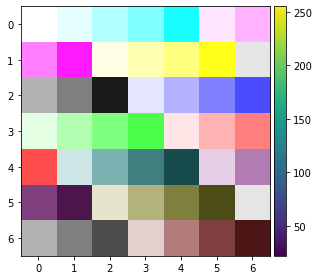

In [6]:
array = numpy.asarray(colors_rgb).reshape((7,7,3))
io.imshow(colors_rgb.reshape((7,7,3)))

In [7]:
r,g,b = colors_rgb[:, 0], colors_rgb[:, 1], colors_rgb[:, 2]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


my_cmap = plt.get_cmap('viridis')

# Creating plot
plot = ax.scatter3D(r, g, b, c=y, cmap = my_cmap)
plt.title("Isc associated with RGB")
fig.colorbar(plot, ax = ax, shrink = 0.5, aspect = 5)


# show plot
plt.show()

<IPython.core.display.Javascript object>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

X = colors_rgb
y = y

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=15, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.09393940726489033

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.9568751978618906


In [11]:
points_amount = 18
points = []
x, y, z = 0, 0, 0
while x < 256:
    while y < 256:
        while z < 256:
            points.append([x,y,z])
            z += 256/points_amount
        z = 0
        y += (256/points_amount)
    y = 0
    x += (256/points_amount) 
print(points)


[[0, 0, 0], [0, 0, 14.222222222222221], [0, 0, 28.444444444444443], [0, 0, 42.666666666666664], [0, 0, 56.888888888888886], [0, 0, 71.11111111111111], [0, 0, 85.33333333333334], [0, 0, 99.55555555555557], [0, 0, 113.7777777777778], [0, 0, 128.00000000000003], [0, 0, 142.22222222222226], [0, 0, 156.44444444444449], [0, 0, 170.6666666666667], [0, 0, 184.88888888888894], [0, 0, 199.11111111111117], [0, 0, 213.3333333333334], [0, 0, 227.55555555555563], [0, 0, 241.77777777777786], [0, 14.222222222222221, 0], [0, 14.222222222222221, 14.222222222222221], [0, 14.222222222222221, 28.444444444444443], [0, 14.222222222222221, 42.666666666666664], [0, 14.222222222222221, 56.888888888888886], [0, 14.222222222222221, 71.11111111111111], [0, 14.222222222222221, 85.33333333333334], [0, 14.222222222222221, 99.55555555555557], [0, 14.222222222222221, 113.7777777777778], [0, 14.222222222222221, 128.00000000000003], [0, 14.222222222222221, 142.22222222222226], [0, 14.222222222222221, 156.44444444444449],

In [12]:
points_pred = regr.predict(points)
print(points_pred)

[3.16643458 3.18170683 3.19697908 ... 4.78668575 4.801958   4.81723025]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


my_cmap = plt.get_cmap('viridis')

# Creating plot
x, y, z = zip(*points)
plot = ax.scatter3D(x,y,z, c=points_pred, cmap = my_cmap)
fig.colorbar(plot, ax = ax, shrink = 0.5, aspect = 5)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# show plot
plt.show()

<IPython.core.display.Javascript object>

In [15]:
print(regr.coef_ )
print(regr.intercept_)

[0.00314517 0.00260874 0.00107383]
3.166434582014097
